Notebook for personal exploration of acquired data

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import funclib
tc = 'white'

print(os.getcwd())

/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/mnt/c/Users/lea/OneDrive/SolarML_2023/Solar_Segmentation


In [ ]:
'''
Instead of segmenting all the new data, lets try augmenting the ones that are ok.
    - Delete all .npy files coming from bad segmentations
    - For the remaing ones, create new files 
        a: original 
        b, c, d: flipped over vert center, horiz center, and diagnol
        e, f: rotated by 90 cw and ccw
        g, h, i, j: rescaled by various factors (e.g. changing resolution)
Also, first would want to do this with just binary seg into new UNetData/seg_images_binary folder
'''

'''
Wait, why did I think some were ok? they all look terrible.
Ok, so its becasue there are blury regions that screw up the initial thresholding. 
Kevin says perhaps at some point will have better data, but not much we can do to clean up the ones we have.
Benoit says perhaps ok to just use first like with a bunch of augmentations.
SO lets just break up that image, first deleting all the VBI npy files cuase they are bad 
'''
# # # Remove all .npy files
# # dir = os.getcwd()+"/Data/UNetData/seg_images_binary/"
# # files = [filename for filename in os.listdir(dir) if 'FirstLight' not in filename]
# # for file in files:
# #     os.remove(dir+file)
# # dir = os.getcwd()+"/Data/UNetData/seg_images/"
# # files = [filename for filename in os.listdir(dir) if 'FirstLight' not in filename]
# # for file in files:
# #     os.remove(dir+file)
# # dir = os.getcwd()+"/Data/UNetData/images/"
# # files = [filename for filename in os.listdir(dir) if 'FirstLight' not in filename]
# # for file in files:
# #     os.remove(dir+file)

# # Break up images and segimages
# dir = os.getcwd()+"/Data/"
# imgoutdir = os.getcwd()+"/Data/UNetData/images/"
# segoutdir = os.getcwd()+"/Data/UNetData/seg_images/" 
# os.mkdir(imgoutdir)
# os.mkdir(segoutdir)
# n = 15 # sqrt of num pieces to break each image and seg image into
# files = ['DKIST_solarseg_output.fits','DKIST_example.fits'] 
# label = 'FirstLight'
# for file in files:
#     data = np.squeeze(fits.open(dir+file)[0].data)
#     data =  data[20:-20, 20:-20] 
#     N = np.min(np.shape(data)) 
#     len = int(N/n) 
#     num = 0
#     for i in range(n):
#         for j in range(n):
#             name = label + '__' + str(num); num += 1
#             x1 = len * i
#             x2 = len * (i + 1)
#             y1 = len * j
#             y2 = len * (j + 1)
#             saveimage =  data[x1:x2, y1:y2]
#             if file == 'DKIST_solarseg_output.fits': np.save(segoutdir+'SEG_'+name, saveimage) 
#             if file == 'DKIST_example.fits': np.save(imgoutdir+name, saveimage)

## And break up binary seg images (idk why I did this seperatley)
# binsegoutdir = os.getcwd()+"/Data/UNetData/seg_images_binary/" 
# os.mkdir(binsegoutdir)
# file = 'Data/DKIST_solarseg_output_noBPDMs.fits'
# data = np.squeeze(fits.open(file)[0].data)
# data =  data[20:-20, 20:-20] 
# n = 15 # sqrt of num pieces to break each image and seg image into
# N = np.min(np.shape(data)) 
# len = int(N/n) 
# num = 0
# label = 'FirstLight'
# for i in range(n):
#     for j in range(n):
#         name = label + '__' + str(num); num += 1
#         x1 = len * i
#         x2 = len * (i + 1)
#         y1 = len * j
#         y2 = len * (j + 1)
#         saveimage = data[x1:x2, y1:y2]
#         np.save(binsegoutdir+'SEG_'+name, saveimage) 

# # Check these look like same images
# a =  np.load('Data/UNetData/images/FirstLight__1.npy')
# plt.figure(); plt.imshow(a)
# a =  np.load('Data/UNetData/seg_images/SEG_FirstLight__1.npy')
# plt.figure(); plt.imshow(a)
# a =  np.load('Data/UNetData/seg_images_binary/SEG_FirstLight__1.npy')
# plt.figure(); plt.imshow(a)

'''
Apply transformations
        a: original 
        b, c, d: flipped over vert center, horiz center, and diagnol
        e, f: rotated by 90 cw and ccw
        g, h, i: rescaled by various factors (e.g. changing resolution)
'''

# def apply_transfs(data, label, outdir):
#     data_a = data
#     data_b = np.flip(data, axis=0) # flip vert
#     data_c = np.flip(data, axis=1) # flip horiz
#     data_d = np.flip(data) # flip diag
#     data_e = np.rot90(data, axes=(0, 1)) # rotate 90 ccw
#     data_f = np.rot90(data, axes=(1, 0)) # rotate 90 cw
#     # data_g = # change res (only apply to the data not seg)
#     # data_h = # change res
#     # data_i = # change res
#     transfs = [data_a, data_b, data_c, data_d, data_e, data_f]#, data_f, data_g, data_h]
#     tags = ['a', 'b', 'c', 'd', 'e', 'f'] #, 'f', 'g', 'h']
#     for i in range(6):
#         print(outdir+label+tags[i]) 
#         np.save(outdir+label+tags[i], transfs[i]) # print(outdir+label+tags[i]) 

# imgdir = os.getcwd()+"/Data/UNetData/images/"
# segdir = os.getcwd()+"/Data/UNetData/seg_images/"
# binsegdir = os.getcwd()+"/Data/UNetData/seg_images_binary/"
# for file in os.listdir(imgdir):
#     label = file[:-4]
#     data = np.load(imgdir+file)
#     apply_transfs(data, label, imgdir)
#     segfile = [filename for filename in os.listdir(segdir) if label in filename][0] # seg file with same label
#     segdata = np.load(segdir+segfile)
#     apply_transfs(segdata, 'SEG_'+label, segdir)
#     binsegfile = [filename for filename in os.listdir(binsegdir) if label in filename][0] # binseg file with same label
#     binsegdata = np.load(binsegdir+binsegfile)
#     apply_transfs(binsegdata,'SEG_'+label, binsegdir)
#     print(f'Removing {imgdir+file}'); print(f'Removing {segdir+segfile}'); print(f'Removing {binsegdir+binsegfile}')
#     os.remove(imgdir+file); os.remove(segdir+segfile), os.remove(binsegdir+binsegfile) # remove the originals (now saved as 'a')

'''
Break data into training and test folders (there must be a better way to do this then pre-seperating them)
    - loop through files in image dir, randomly decide (use like 30:70) to put in images/train or images/val
    - find the corresponding seg file and binary_seg file, put them in seg_images/train and seg_images_binary_train or seg_images/val and seg_images_binary_val
But I can always put them back later if I figure out a way to do like train_test_split
'''

imgdir = os.getcwd()+"/Data/UNetData/images/"
segdir = os.getcwd()+"/Data/UNetData/seg_images/"
binsegdir = os.getcwd()+"/Data/UNetData/seg_images_binary/"
# os.mkdir(imgdir+'test/')
# os.mkdir(imgdir+'val/')
# os.mkdir(segdir+'test/')
# os.mkdir(segdir+'val/')
# os.mkdir(binsegdir+'test/')
# os.mkdir(binsegdir+'val/')
for imgfile in os.listdir(imgdir):
    label = imgfile[:-4]
    segfile = [filename for filename in os.listdir(segdir) if label in filename][0]
    binsegfile = [filename for filename in os.listdir(binsegdir) if label in filename][0]
    folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
    shutil.move(imgdir+imgfile, imgdir+folder+'/'+imgfile)
    shutil.move(segdir+segfile, segdir+folder+'/'+segfile)
    shutil.move(binsegdir+binsegfile, binsegdir+folder+'/'+binsegfile)



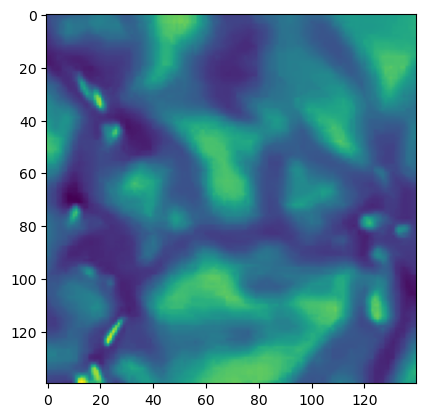

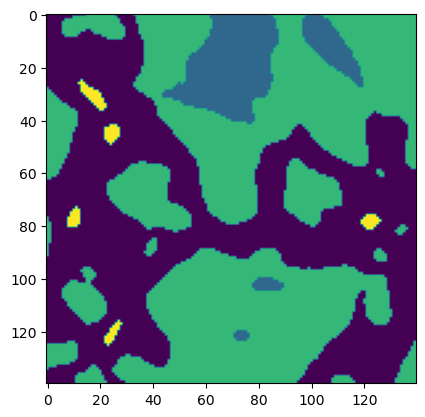

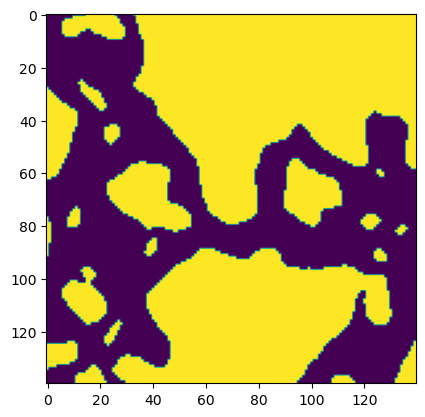

In [36]:
'''
Cant get blurring/downsampling to work well
'''

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.ndimage import convolve
# import cv2

# k1 = np.array([[1, 1, 1],
#                [1, 1, 1],
#                [1, 1, 1]])/9
# k1 = np.array([[1, 1],
#                [1, 1]])/9
# k1 = np.array([[1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1]])/9
# k2 = np.array([[0, -1, 0],
#                 [-1, 5, -1],
#                 [0, -1, 0]])

# a = cv2.filter2D(a, -1, k2)
# plt.figure(); plt.imshow(a)

# a = convolve(a ,np.array([[0.25,0.25],[0.25,0.25]]))[:a.shape[0]:2,:a.shape[1]:2]
# plt.figure(); plt.imshow(a)
# a = convolve(a ,np.array([[0.25,0.25],[0.25,0.25]]))[:a.shape[0]:3,:a.shape[1]:3]
# plt.figure(); plt.imshow(a)


IndexError: list index out of range

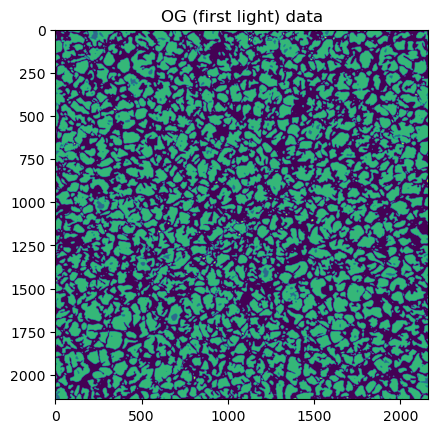

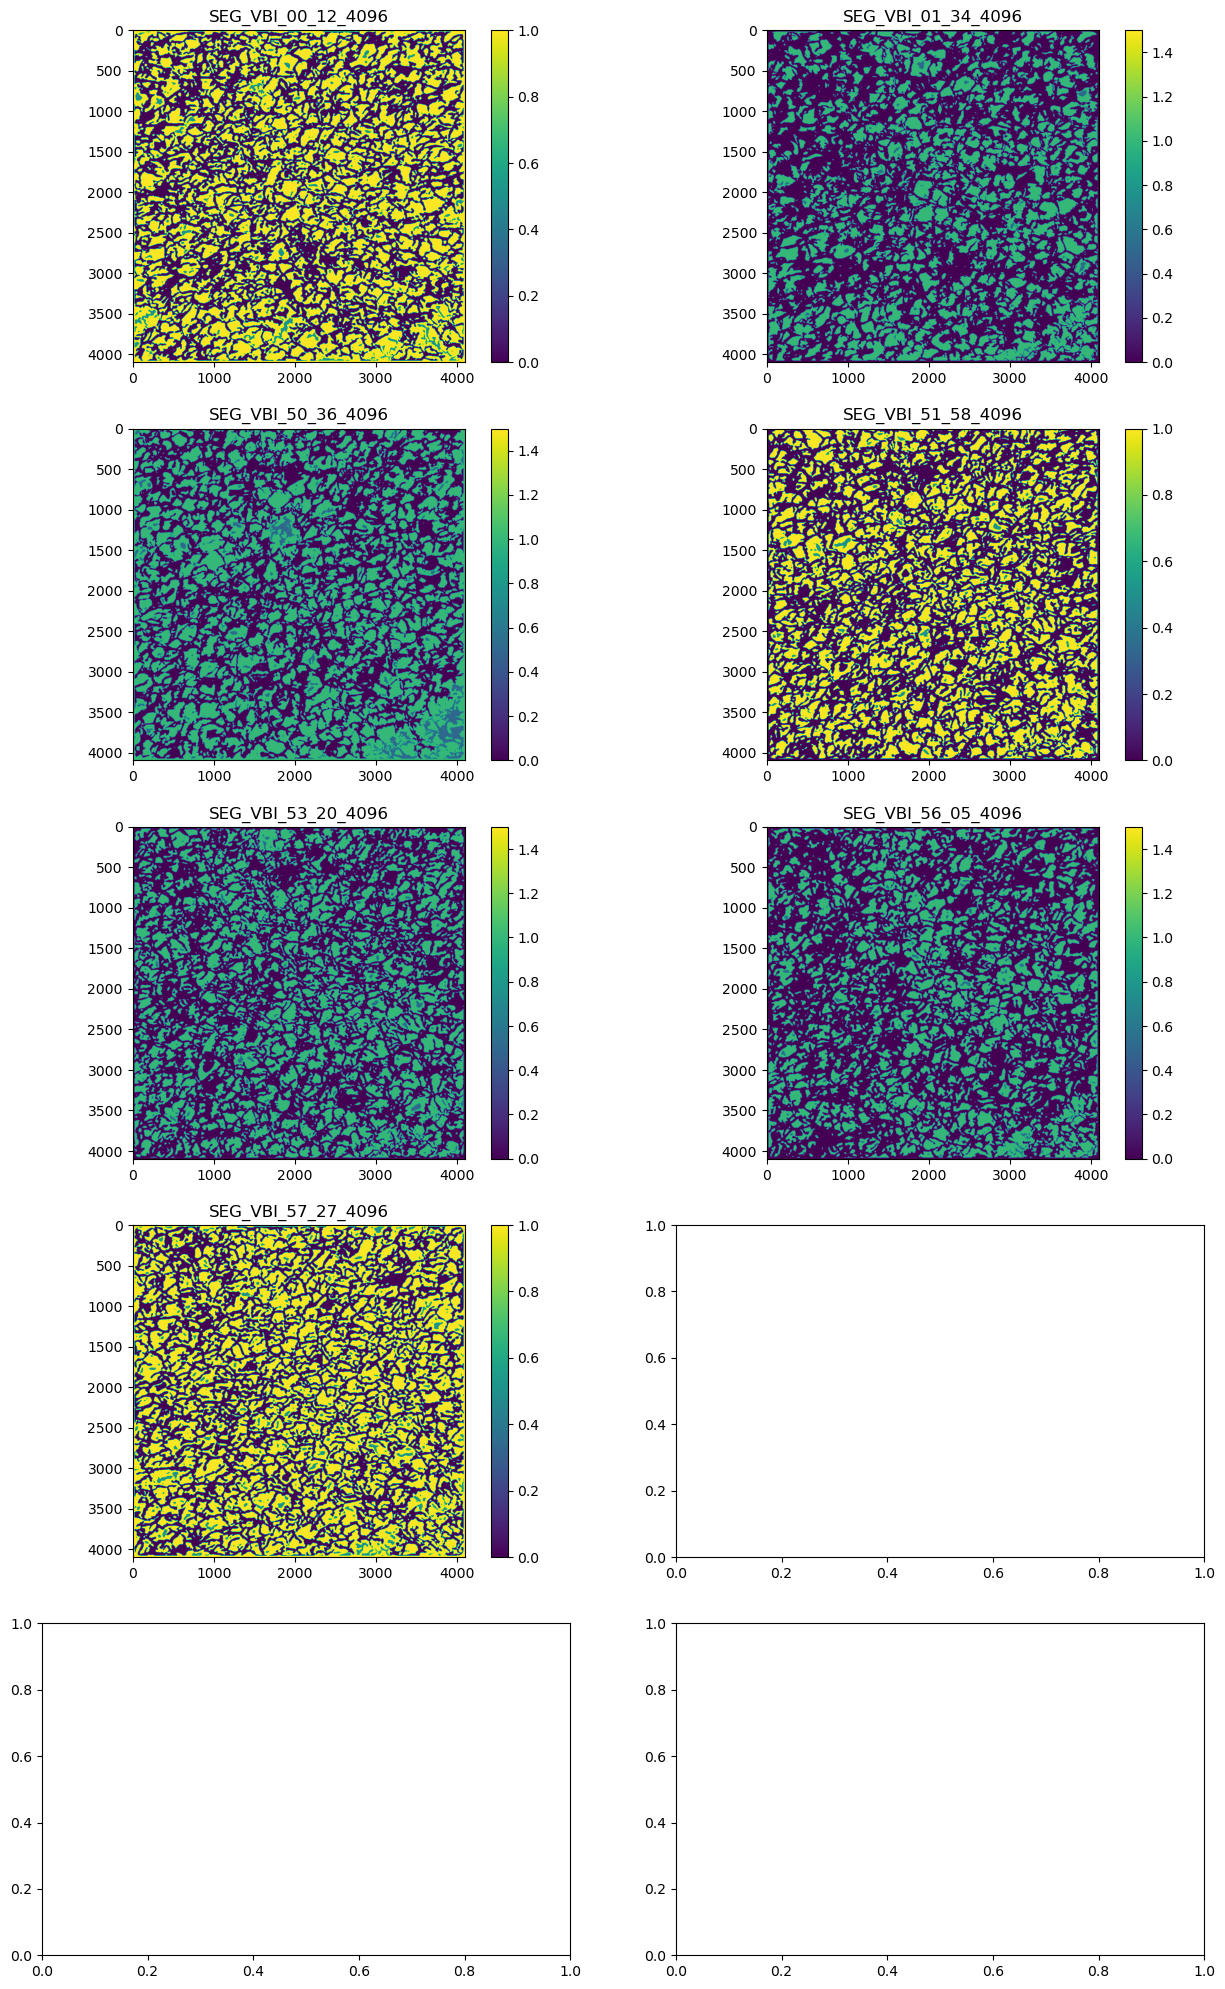

In [11]:
'''
Do .npy files in UNetData look ok?
'''

# segdata_piece = np.load('Data/UNetData/seg_images/SEG_VBI_00_12__130.npy')
# plt.figure(figsize=(5, 5))
# im = plt.imshow(segdata_piece) # IG = 0, G = 1, DM = 0.5, BP = 1.5
# plt.colorbar(im)

'''
Wait, none of these pieces look like they have faculae/BP? Lets looks at all the full images they came from
'''

# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) =  plt.subplots(5, 2, figsize=(15, 25)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
# dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
# files = [filename for filename in os.listdir(dir) if filename.startswith("SEG") and filename.endswith('_4096')]
# for i in range(10):
#     segdata = np.squeeze(fits.open(dir+files[i])[0].data)
#     im = axs[i].imshow(segdata)
#     axs[i].set_title(files[i])
#     plt.colorbar(im, ax=axs[i])

'''
Ok so theres some issues with these -
some dont get fac IDd, some get large regions of IG IDd as DM
Lets just look at the fraction of G, IG, DM, BP in each
'''

# segdata = np.squeeze(fits.open('Data/DKIST_solarseg_output.fits')[0].data).flatten()
# print(f'"Good" baseline (from original first-light example): pctG={np.round(100*len(segdata[segdata==1])/len(segdata),)}, pctIG={np.round(100*len(segdata[segdata==0])/len(segdata),2)}, pctDM={np.round(100*len(segdata[segdata==0.5])/len(segdata),2)}, pctBP={np.round(100*len(segdata[segdata==1.5])/len(segdata),4)}')
# print('Segmentations of new DKIST data:')
# dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
# files = [filename for filename in os.listdir(dir) if filename.startswith("SEG") and filename.endswith('_4096')]
# for file in files:
#     segdata = np.squeeze(fits.open(dir+file)[0].data).flatten()
#     print(f'\t{file}: pctG={np.round(100*len(segdata[segdata==1])/len(segdata),)}, pctIG={np.round(100*len(segdata[segdata==0])/len(segdata),2)}, pctDM={np.round(100*len(segdata[segdata==0.5])/len(segdata),2)}, pctBP={np.round(100*len(segdata[segdata==1.5])/len(segdata),4)}')

'''
So they all have way fewer ID'd BPs than in OG. Is that cuase there are non or cuase it doesnt pick them up?
Lets plot the og data and the segs together
'''

# ogdata = fits.open('Data/DKIST_example.fits')[0].data
# ogsegdata = np.squeeze(fits.open('Data/DKIST_solarseg_output.fits')[0].data)
# fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(15, 5))
# im1 = ax1.imshow(data)
# ax1.set_title('OG data')
# plt.colorbar(im1, ax=ax1)
# im2 = ax2.imshow(ogsegdata)
# plt.colorbar(im2, ax=ax2)

# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20)) =  plt.subplots(10, 2, figsize=(15, 50)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20]
# dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
# datafiles = [filename for filename in os.listdir(dir) if filename.startswith('VBI') and filename.endswith('_4096')] 
# j = 0
# for i in range(0, 19, 2):
#     data = fits.open(dir+datafiles[j])[1].data
#     segdata = np.squeeze(fits.open(dir+'SEG_'+datafiles[j])[0].data)
#     im = axs[i].imshow(data, vmin=0, vmax=120000)
#     axs[i].set_title(datafiles[j])
#     plt.colorbar(im, ax=axs[i])
#     im = axs[i+1].imshow(segdata)
#     plt.colorbar(im, ax=axs[i+1])
#     j += 1

'''
Looks like the main issue is that it is over IDing DMs from what should be IG
Seems like the core issue is that some granules are too big, so they touch others trapping IG so it gets marked D<
But also then there are areas that ust have dim granules that are left as IG.
So its an issue with the initial thresholding. 
Whats different? Generally the flux range is a bit less in the new images, and perhaps 
'''

'''
One of the worst ones appears to be VBI_02_56. It has no BP and lots of extra DM
Lets just play around with pieces of it to try to get a good segmentation.
Perhaps I cant do the thresholding based on a the small corner region (perhaps it is too different across the image)
Can I do a random sample of pixels? Or does li threhsolding require spatial infromation?
Lets try: 
        1) Thresholding based on middle 500*500
        2) Thresholding based on 500**2 random sample of pixels
'''

# datafile = 'Data/DKIST_gband_series_183653/VBI_02_56_4096'
# data =  fits.open(datafile)[1].data
# header = fits.open(datafile)[1].header
# seg_data = funclib.segment_array(data, resolution=header['cdelt1'], mark_dim_centers=True)
# seg_hdu = fits.PrimaryHDU(seg_data)
# raw_hdu = fits.ImageHDU(data)
# hdu = fits.HDUList([seg_hdu, raw_hdu])
# shape = np.squeeze(seg_data.shape)
# name = f'SEG_VBI_02_56_4096_rand500'
# hdu.writeto('Data/DKIST_gband_series_183653/'+name, overwrite=True)


# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
# seg1 = np.squeeze(fits.open('Data/DKIST_gband_series_183653/SEG_VBI_02_56_4096')[0].data)
# im1 = ax1.imshow(seg1)#, vmin=0, vmax=120000)
# plt.colorbar(im1, ax=ax1)
# ax1.set_title(f'02_56 seg w/ 500x500 corner for threshold')
# data =  fits.open('Data/DKIST_gband_series_183653/VBI_02_56_4096')[1].data
# seg2 = np.squeeze(fits.open('Data/DKIST_gband_series_183653/SEG_VBI_02_56_4096_mid500')[0].data)
# im2 = ax2.imshow(seg2)
# plt.colorbar(im2, ax=ax2)
# ax2.set_title(f'02_56 seg w/ 500x500 center for threshold')
# seg3 = np.squeeze(fits.open('Data/DKIST_gband_series_183653/SEG_VBI_02_56_4096_rand500')[0].data)
# im3 = ax3.imshow(seg3)
# plt.colorbar(im3, ax=ax3)
# ax3.set_title(f'02_56 seg w/ random 500x500 for threshold')

'''
Wow, both of those look sooo much better. Maybe it was just that using the corner had that edge stuff.
Ok, will go back and redo them all like this.
Now lets looks at what they all look like. PLOT ALL SEGMENTATIONS:
'''

plt.figure()
OGsegdata = np.squeeze(fits.open('/mnt/c/Users/lea/OneDrive/SolarML_2023/Solar_Segmentation/Data/DKIST_solarseg_output.fits')[0].data)
plt.imshow(OGsegdata)
plt.title('OG (first light) data') 

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) =  plt.subplots(5, 2, figsize=(15, 25)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
datafiles = [filename for filename in os.listdir(dir) if filename.startswith('SEG_VBI') and filename.endswith('_4096')] 
for i in range(10):
    segdata = np.squeeze(fits.open(dir+datafiles[i])[0].data)
    im = axs[i].imshow(segdata)
    axs[i].set_title(datafiles[i])
    plt.colorbar(im, ax=axs[i])

'''
Hmm clearly some of them still get messed up: [00_12, 51_68, 57_27]
Also, recall that three got skipped cuase it inaccuratly thought the file existed: [02_56, 54_43, 58_49]
Lets try rerunning the ones that a center thresholding region didnt work for with a random region?
Note -> there will be no indication besides this note which files were rand500 vs cent500
'''
# dir = 'Data/DKIST_gband_series_183653/'
# datafiles = ['VBI_51_58_4096', 'VBI_57_27_4096'] # ['VBI_00_12_4096', 'VBI_51_58_4096', 'VBI_57_27_4096']
# for datafile in datafiles:
#         data =  fits.open(dir+datafile)[1].data
#         header = fits.open(dir+datafile)[1].header
#         seg_data = funclib.segment_array(data, resolution=header['cdelt1'], mark_dim_centers=True)
#         seg_hdu = fits.PrimaryHDU(seg_data)
#         raw_hdu = fits.ImageHDU(data)
#         hdu = fits.HDUList([seg_hdu, raw_hdu])
#         shape = np.squeeze(seg_data.shape)
#         name = f'SEG{datafile}' # removing rand500 tag
#         hdu.writeto(dir+name, overwrite=True)

'''
Nope, they are still messed up in a similar way. Oy vey.
And actually, the other ones (cent00) look pretty wierd too.
Hopefully the too-much-DM and no-BP issues seem to stem from the bad initial thresholding (big holes)
Lets go back to trying to get a good seg of VBI_02_56. Lets just try running thresholding.
'''

# import scipy.ndimage as sndi
# import skimage
# datafile = 'Data/DKIST_gband_series_183653/VBI_02_56_4096'
# data =  fits.open(datafile)[1].data
# median_filtered = sndi.median_filter(data, size=3)

# data1 = data[int(np.shape(data)[0]/2)-250:int(np.shape(data)[0]/2)+250, int(np.shape(data)[1]/2)-250:int(np.shape(data)[1]/2)+250]
# threshold1 = skimage.filters.threshold_li(data1)
# seg1 = np.uint8(median_filtered > threshold1)
# data2 = data[int(np.shape(data)[0]/2)-250:int(np.shape(data)[0]/2)+250, int(np.shape(data)[1]/2)-250:int(np.shape(data)[1]/2)+250]
# threshold2 = skimage.filters.threshold_otsu(data2)
# seg2 = np.uint8(median_filtered > threshold2)
# data2 = data[int(np.shape(data)[0]/2)-250:int(np.shape(data)[0]/2)+250, int(np.shape(data)[1]/2)-250:int(np.shape(data)[1]/2)+250]
# threshold2 = skimage.filters.threshold_yen(data2)
# seg3 = np.uint8(median_filtered > threshold2)

# segs = [data,seg1,seg2,seg3]
# names = ['Data', 'Li cent500', 'Otsu cent500', 'Yen cent500']
# fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2, 2)
# axs = [ax1, ax2, ax3, ax4]
# for i in range(len(segs)): 
#         axs[i].imshow(segs[i])
#         axs[i].set_title(names[i])

'''
Ok, none of these are good.
But instead of spending a ton of time trying to rework the thresholding algorithm, 
why dont I just do augmentations on the data I already have?
SEE ABOVE CELL
'''



"\nYeah they're the same, so I'm ust gonna delete the set with the original names.\n"

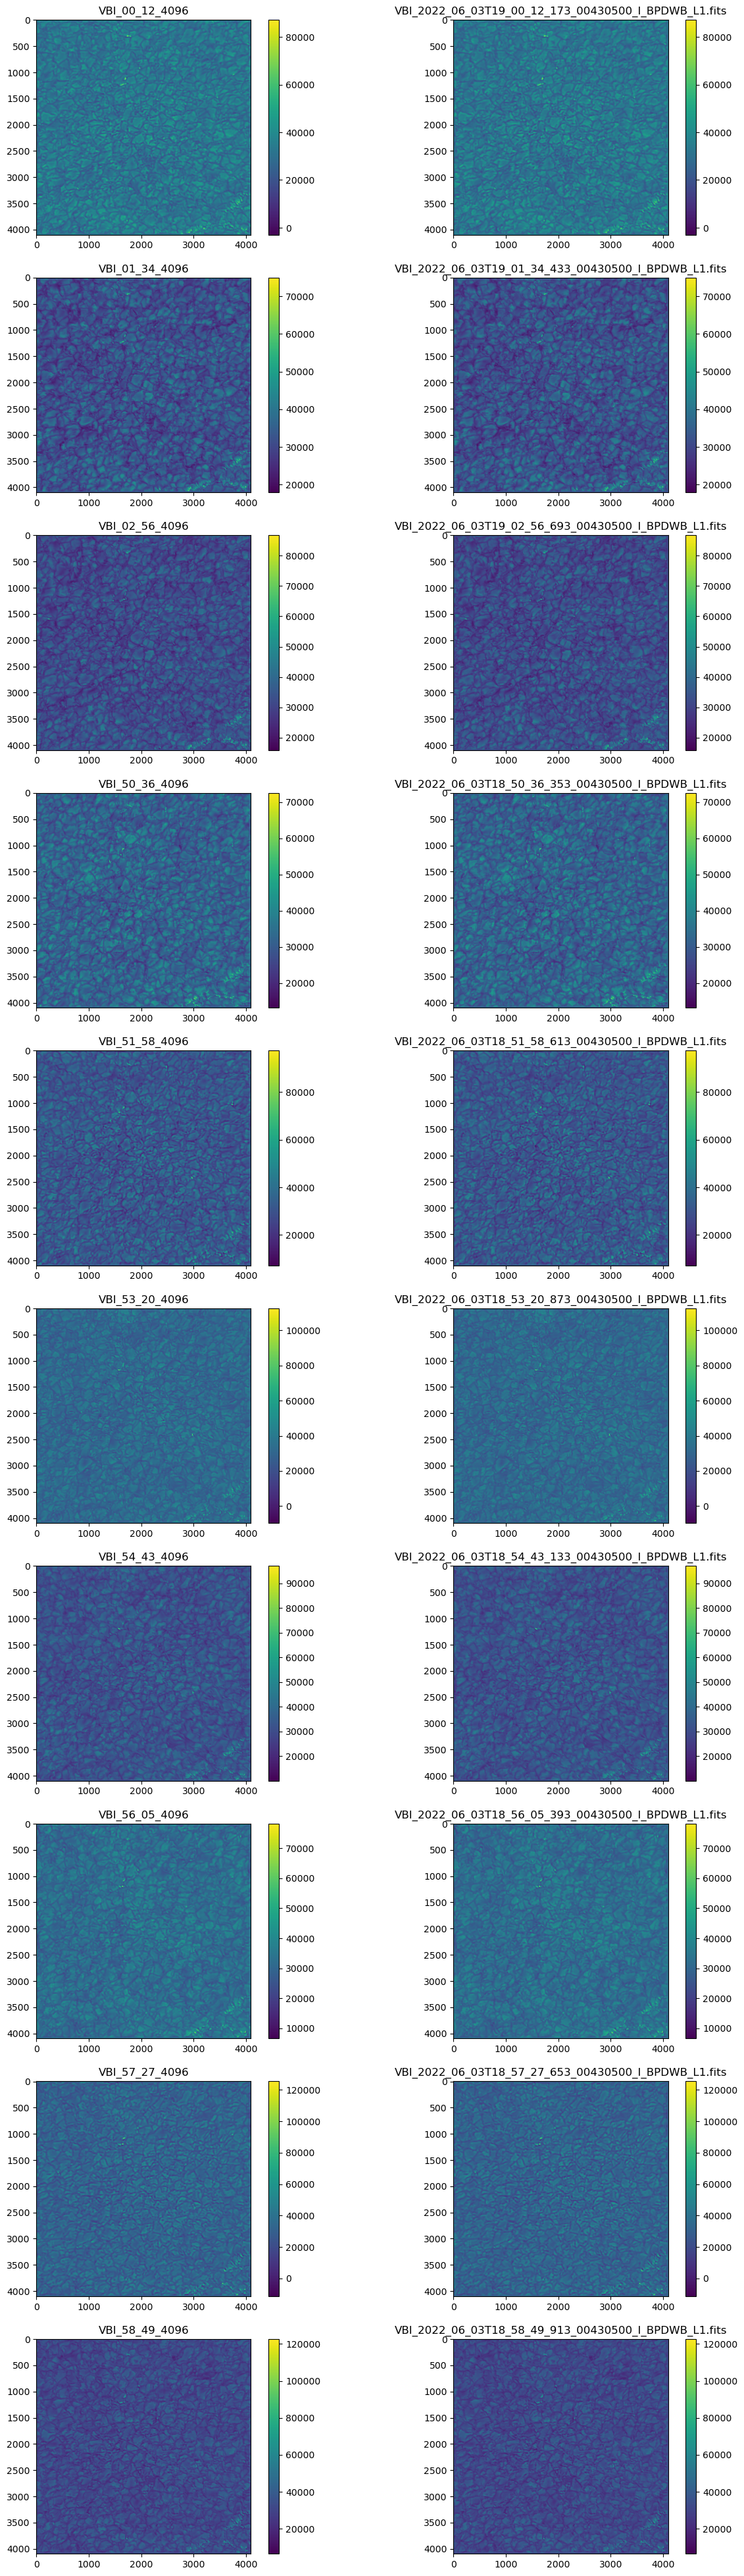

In [19]:
'''
Wait, the VBI_[]_4096 files are the same as the VBI_2022_06_03T18_[]_353_00430500_I_BPDWB_L1 files right? 
I think I just didnt delete after renaming.
'''

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20)) =  plt.subplots(10, 2, figsize=(15, 50)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20]
dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
datafiles = [filename for filename in os.listdir(dir) if filename.startswith('VBI') and filename.endswith('_4096')] 
j = 0
for i in range(0, 19, 2):
    data1 = fits.open(dir+datafiles[j])[1].data
    im = axs[i].imshow(data1)
    axs[i].set_title(datafiles[j])
    plt.colorbar(im, ax=axs[i])
    label =  datafiles[j][datafiles[j].find('VBI')+4:-5]
    datafile2 = [filename for filename in os.listdir(dir) if filename.startswith('VBI_2022') and label in filename][0] 
    data2 = fits.open(dir+datafile2)[1].data
    im = axs[i+1].imshow(data2)
    axs[i+1].set_title(datafile2)
    plt.colorbar(im, ax=axs[i+1])
    j += 1

'''
Yeah they're the same, so I'm just gonna delete the set with the original names.
'''

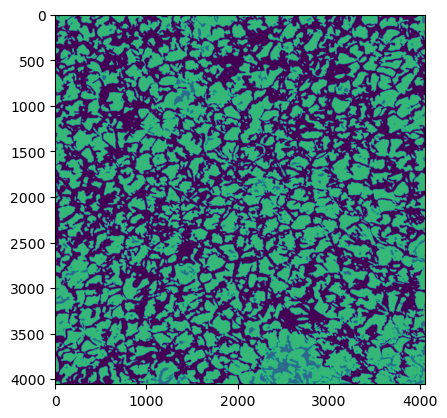

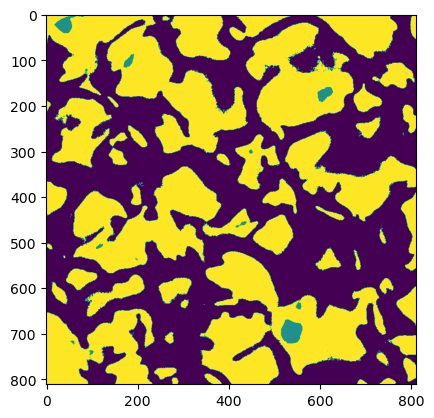

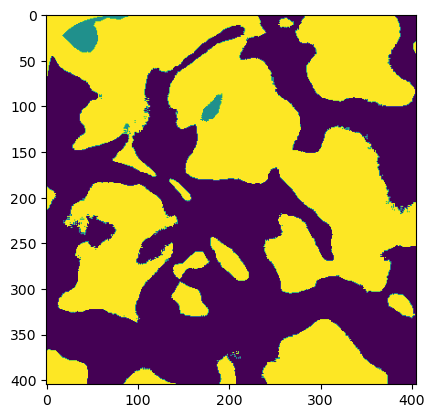

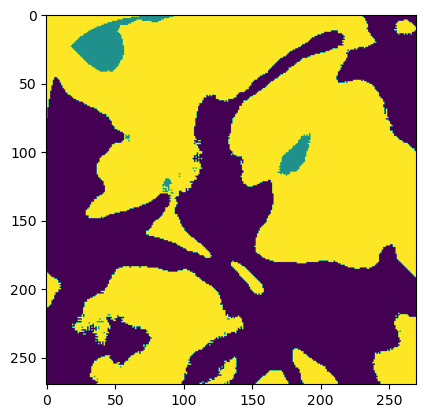

In [2]:
# How much cutting can I do?

data = np.squeeze(fits.open('Data/DKIST_gband_series_183653/SEG_VBI_54_43_4096')[0].data)
data =  data[20:-20, 20:-20] # remove edges cause theres weird edge effects
plt.figure(); plt.imshow(data)
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/5), 0:int(np.shape(data)[1]/5)])
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/10), 0:int(np.shape(data)[1]/10)])
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/15), 0:int(np.shape(data)[1]/15)])

In [4]:
OG_data = fits.open("Data/DKIST_example.fits")[0].data
# OG_header = fits.open("Data/DKIST_example.fits")[0].header NOT CORRECT!!!
OG_data_seg = np.squeeze(fits.open("Data/DKIST_solarseg_output.fits")[0].data)
new_data = fits.open("Data/DKIST_gband_series_183653/VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].data
new_header = fits.open("Data/DKIST_gband_series_183653/VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].header
new_data_cut = fits.open("Data/DKIST_gband_series_183653/SEG_VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].data
new_data_seg_cut = fits.open("Data/DKIST_gband_series_183653/SEG_VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[0].data[0,:,:]
print(np.shape(new_data_seg_cut))

fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
ax1.imshow(OG_data, origin='lower'); ax1.set_title('OG data', color=tc)
ax2.hist(OG_data.reshape(-1), range=(4000, 60000), bins=1000, density=True); ax2.set_title('OG data values', color=tc)
ax3.imshow(OG_data_seg, origin='lower'); ax3.set_title('OG data segmented (labels)', color=tc)
plt.suptitle('Res 0.017 arcsec/pix,  WL 789.2 nm', color=tc)
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
ax1.imshow(new_data_cut, origin='lower'); ax1.set_title('new data (cut)', color=tc)
ax2.hist(new_data_cut.reshape(-1), range=(4000, 60000), bins=1000, density=True); ax2.set_title('new data values', color=tc)
ax3.imshow(new_data_seg_cut, origin='lower'); ax3.set_title('new data segmented (labels)', color=tc)
plt.suptitle('Res '+str(np.round(new_header['cdelt1'], 3))+' arcsec/pix,  WL '+str(new_header['linewav'])+' nm', color=tc)
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

# NOTE
# 1) New images have similar spatial scale, but twice as many pixels -> much higher resolution
# 2) New images more blurred. Have wider pix value range, but its much less peaked, e.g more uniform
# 3) Segmentation is NOT working for new images.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (319505189.py, line 3)

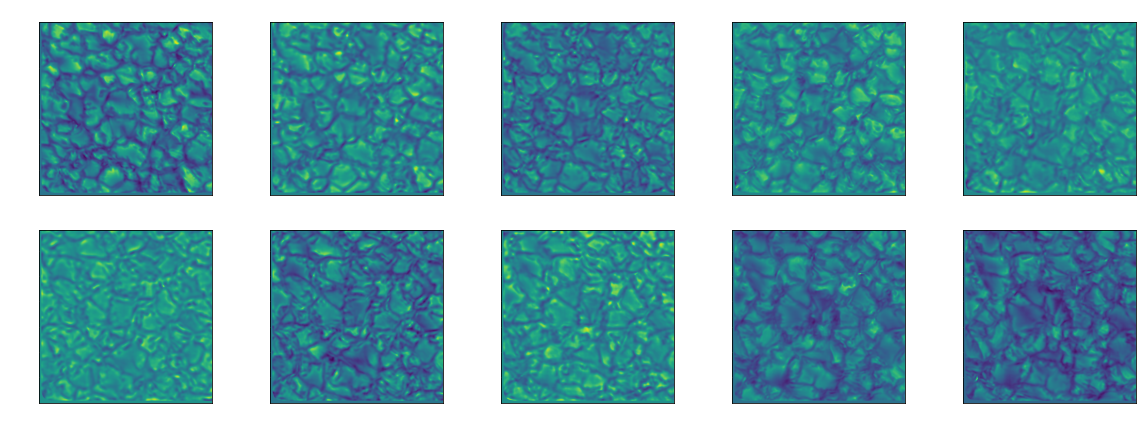

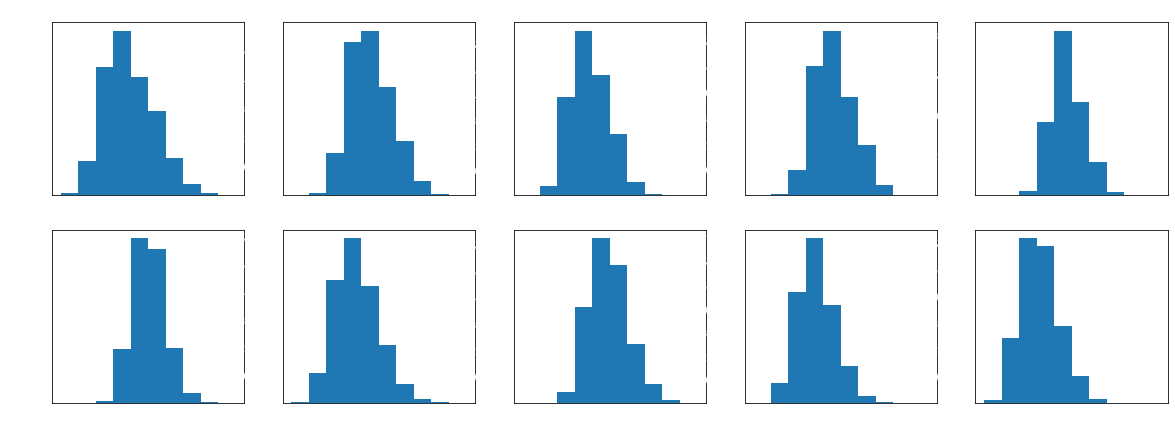

In [18]:
# Why does 53_20 seems to get stuck, even when cut down to sizes where the first two run fast??
# They all looks similar


dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
files = os.listdir(dir)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) =  plt.subplots(2, 5, figsize=(20, 7))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for file in files:
    if not (file.startswith('seg_') or file.startswith('SEG_')):
        data = fits.open(dir+file)[1].data # for files in DKIST_gband_series_183653, first HDU is just header
        data = data[0:int(np.shape(data)[0]/3), 0:int(np.shape(data)[1]/3)] # cut data by a factor of 9
        axs[i].imshow(data, origin='lower'); 
        label =  file[file.find('03T')+6:file.find('_00')-4] #print(label)
        axs[i].set_title(label, color=tc)
        i +=1
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)


fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) =  plt.subplots(2, 5, figsize=(20, 7))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for file in files:
    if not (file.startswith('seg_') or file.startswith('SEG_')):
        data = fits.open(dir+file)[1].data # for files in DKIST_gband_series_183653, first HDU is just header
        data = data[0:int(np.shape(data)[0]/3), 0:int(np.shape(data)[1]/3)] # cut data by a factor of 9
        axs[i].hist(data.reshape(-1)); 
        label =  file[file.find('03T')+6:file.find('_00')-4] #print(label)
        axs[i].set_title(label, color=tc)
        i +=1
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

file = 'SolarML_2023/Solar_Segmentation/Data/DKIST_gband_series_183653/VBI_02_56_4096
data = fits.open(file)[1].data # for files in DKIST_gband_series_183653, first HDU is just header
data = data[30:int(np.shape(data)[0]/10 +30 ), 30:int(np.shape(data)[1]/10)+30] # cut data by a factor of 10
header = fits.open(file)[1].header
hdu = fits.PrimaryHDU(data, header)
hdu = fits.HDUList([hdu])
hdu.writeto('TrueDKIST_example.fits', overwrite=True)

plt.imshow(fits.open("/mnt/c/Users/Lea/OneDrive/DKISTSegmentation/sunkit-image/TrueDKIST_example.fits"))


NameError: name 'data' is not defined

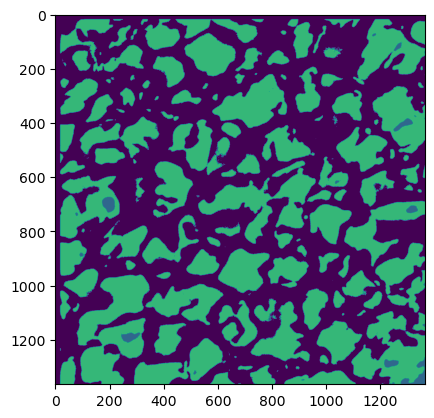

<Figure size 640x480 with 0 Axes>

In [12]:
seg_50_36 = fits.open("Data/DKIST_gband_series_183653/SEG_VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[0].data
seg_50_36 =  np.squeeze(seg_50_36)
plt.imshow(seg_50_36)

seg_noBPDMs = fits.open("Data/DKIST_solarseg_output_noBPDMs.fits")[0].data
seg_noBPDMs =  np.squeeze(seg_noBPDMs)
plt.figure()
plt.imshow(seg_noBPDMs[0:int(np.shape(data)[0]/5), 0:int(np.shape(data)[1]/5)])

In [6]:
from scipy.stats import chi2
import numpy as np

delta_v1 = 6.5697 * 1000
delta_v2 = 7.6409 * 1000
sigma_delta_v1 = 0.213 * 10**13
sigma_delta_v2 = 0.254 * 10**13

delta_v_err = np.sqrt((sigma_delta_v1 / 10**10)**2 + (sigma_delta_v2 / 10**10)**2) # add in quadrature ???
df = 1 # becuase only one data point
chi_sq = (delta_v1 - delta_v2)**2/delta_v_err**2

print((delta_v1 - delta_v2)**2)
print(chi_sq)

P = 1 - chi2.cdf(chi_sq, df)
print('PTE:', P)

331.48906467634794
10.442457478272756
PTE: 0.0012315130940071528
